In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

# sort both along rows and columns
def sortMatrix(matrix):
    sorted_matrix = np.sort(np.sort(matrix, axis=0), axis=1)
    return sorted_matrix 

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [28]:
# initial parameters
N, mu, std1, std2 = 1000, 0, 1, 3

# gaussian datasets (all x have zero mean)
x1 = np.random.normal(mu, std1, N)
x2 = x1 + np.random.normal(mu, std2, N)
x3 = 2*x1 + x2 # 

X = np.array([x1, x2, x3]) # shape 3 x N

# data set
df = pd.DataFrame()
df['features1'] = x1
df['features2'] = x2
df['features3'] = x3
df

,features1,features2,features3
0,-1.169715,0.870965,-1.468466
1,0.240449,-2.192873,-1.711975
2,-0.290874,1.410800,0.829052
3,0.870838,0.705957,2.447633
4,-0.583911,-0.427318,-1.595141
...,...,...,...
995,-0.887058,1.216246,-0.557871
996,0.004839,0.714179,0.723858
997,-1.141518,1.900100,-0.382936
998,-1.085615,1.774975,-0.396256


The results do not match:

Egienvalues with Eigendecomposition:
 [2.387251e+01 7.448562e-16 2.034797e+00] 

Egienvalues with SVD:
 [2.393507e+01 2.036993e+00 1.003925e-29] 

Eigenvectors with Eigendecomposition:
 [[-0.103864 -0.816497  0.567931]
 [-0.591707 -0.408248 -0.695137]
 [-0.799434  0.408248  0.440725]] 

Eigenvectors with SVD:
 [[-0.103559  0.567987 -0.816497]
 [-0.592079 -0.69482  -0.408248]
 [-0.799198  0.441153  0.408248]] 



By selecting the component 0, we retain 92.16% of the total variability
By selecting the component 1, we retain 7.84% of the total variability
By selecting the component 2, we retain 0.00% of the total variability

The obtained result perfectly make sense since x1 is totally independt
from the others, x2 derives from x1 plus some randomness, instead x3
derives from x1 and x2.

By selecting only the first two components, we retain 100.00% of the toatl variability.



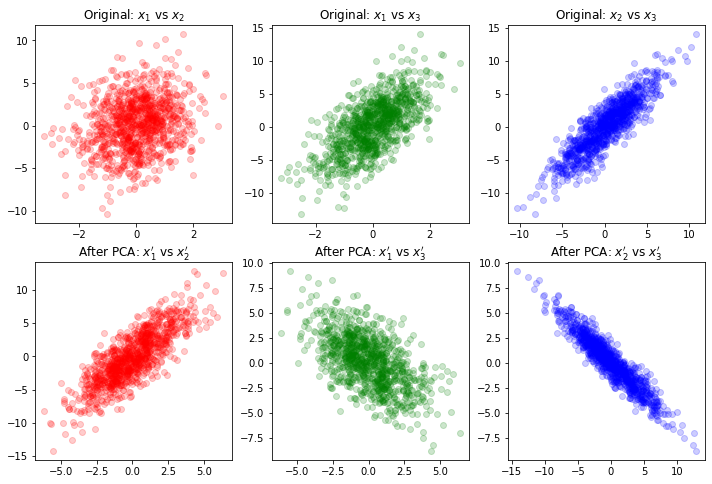

In [29]:
# eigendecomposition of the covariance matrix
C = np.cov(X)
l1, V1 = np.linalg.eig(C) # eigenvalues and eigen vectors

# sigular value decomposition
U, s, Vt = np.linalg.svd(X)

# eigenvalues and eigen vectors
l2 = s**2 / (N-1)
V2 = U

# check the correspondece
if np.allclose(sortMatrix(np.abs(V1)), sortMatrix(np.abs(V2)), rtol=1e-03):
    print('The results match:\n')
else:
    print('The results do not match:\n')
    
# results
print('Egienvalues with Eigendecomposition:\n', l1, '\n')
print('Egienvalues with SVD:\n', l2, '\n')
print('Eigenvectors with Eigendecomposition:\n', V1, '\n')
print('Eigenvectors with SVD:\n', V2, '\n\n\n')

Lambda = np.diag(l2)
print('By selecting the component 0, we retain %.2f%% of the total variability' % (Lambda[0, 0]/Lambda.trace()*100))
print('By selecting the component 1, we retain %.2f%% of the total variability' % (Lambda[1, 1]/Lambda.trace()*100))
print('By selecting the component 2, we retain %.2f%% of the total variability' % (Lambda[2, 2]/Lambda.trace()*100))
print('\nThe obtained result perfectly make sense since x1 is totally independt\nfrom the others, x2 derives from x1 plus some randomness, instead x3\nderives from x1 and x2.')

# reducing the dimension of the system selecting only the first two rows
Lambda_reduced = Lambda[:2, :]
print('\nBy selecting only the first two components, we retain %.2f%% of the toatl variability.\n' % (Lambda_reduced.trace()/Lambda.trace()*100))

# redefine the data according with the new PCA
Xp = np.dot(V2, X)

# plots
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axis[0,0].scatter(X[0], X[1], alpha=0.2, color='r')
axis[0,1].scatter(X[0], X[2], alpha=0.2, color='g')
axis[0,2].scatter(X[1], X[2], alpha=0.2, color='b')
axis[0,0].set_title('Original: $x_1$ vs $x_2$')
axis[0,1].set_title('Original: $x_1$ vs $x_3$')
axis[0,2].set_title('Original: $x_2$ vs $x_3$')

axis[1,0].scatter(Xp[0], Xp[1], alpha=0.2, color='r')
axis[1,1].scatter(Xp[0], Xp[2], alpha=0.2, color='g')
axis[1,2].scatter(Xp[1], Xp[2], alpha=0.2, color='b')
axis[1,0].set_title('After PCA: $x_1\'$ vs $x_2\'$')
axis[1,1].set_title('After PCA: $x_1\'$ vs $x_3\'$')
axis[1,2].set_title('After PCA: $x_2\'$ vs $x_3\'$')

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

The results match:

Egienvalues with Eigendecomposition:
 [26.514422  0.027127  1.851723] 

Egienvalues with SVD:
 [26.547528  1.852331  0.027133] 

Eigenvectors with Eigendecomposition:
 [[-0.116897 -0.818084  0.563093]
 [-0.577707 -0.405174 -0.708583]
 [-0.807831  0.408134  0.425249]] 

Eigenvectors with SVD:
 [[-0.116781  0.563141 -0.818067]
 [-0.577829 -0.708464 -0.405207]
 [-0.80776   0.425382  0.408134]] 



By selecting the component 0, we retain 93.56% of the total variability
By selecting the component 1, we retain 6.44% of the total variability
By selecting the component 2, we retain 0.00% of the total variability

The results are very similar to the above ones, since we simply add some extra noise.

By selecting only the first two components, we retain 100.00% of the toatl variability.



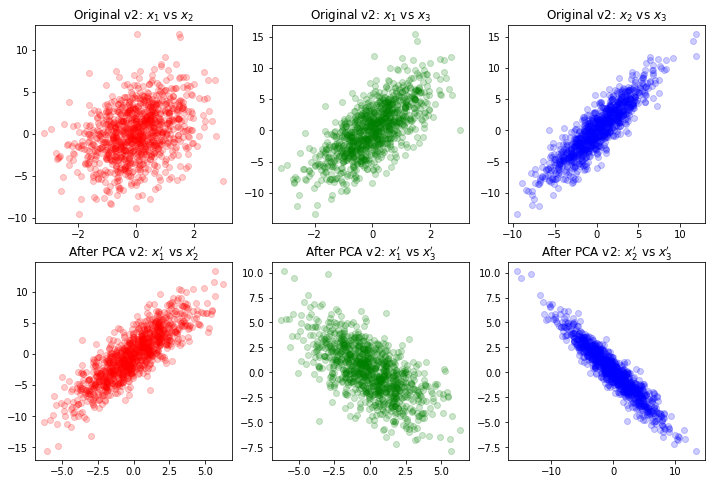

In [25]:
# new parameter
std3 = 0.05
# generate 3D-matrix 3xNx10
noise = np.random.normal(mu, std3, size=(3, N, 10))
# add 10 extra uncorrelated variables normally distributed to the old ones
X2 = X + np.sum(noise, axis = 2)

# eigendecomposition of the covariance matrix
C2 = np.cov(X2)
l3, V3 = np.linalg.eig(C2) # eigenvalues and eigen vectors

# sigular value decomposition
U4, s4, Vt4 = np.linalg.svd(X2)

# eigenvalues and eigen vectors
l4 = s4**2 / (N-1)
V4 = U4

# check the correspondece
if np.allclose(sortMatrix(np.abs(V3)), sortMatrix(np.abs(V4)), rtol=1e-03):
    print('The results match:\n')
else:
    print('The results do not match:\n')
    
# results
print('Egienvalues with Eigendecomposition:\n', l3, '\n')
print('Egienvalues with SVD:\n', l4, '\n')
print('Eigenvectors with Eigendecomposition:\n', V3, '\n')
print('Eigenvectors with SVD:\n', V4, '\n\n\n')

Lambda2 = np.diag(l2)
print('By selecting the component 0, we retain %.2f%% of the total variability' % (Lambda2[0, 0]/Lambda2.trace()*100))
print('By selecting the component 1, we retain %.2f%% of the total variability' % (Lambda2[1, 1]/Lambda2.trace()*100))
print('By selecting the component 2, we retain %.2f%% of the total variability' % (Lambda2[2, 2]/Lambda2.trace()*100))
print('\nThe results are very similar to the above ones, since we simply add some extra noise.')
# reducing the dimension of the system selecting only the first two rows
Lambda_reduced2 = Lambda2[:2, :]
print('\nBy selecting only the first two components, we retain %.2f%% of the toatl variability.\n' % (Lambda_reduced2.trace()/Lambda2.trace()*100))

# redefine the data according with the new PCA
X2p = np.dot(V2, X2)

# plots
fig2, axis2 = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axis2[0,0].scatter(X2[0], X2[1], alpha=0.2, color='r')
axis2[0,1].scatter(X2[0], X2[2], alpha=0.2, color='g')
axis2[0,2].scatter(X2[1], X2[2], alpha=0.2, color='b')
axis2[0,0].set_title('Original v2: $x_1$ vs $x_2$')
axis2[0,1].set_title('Original v2: $x_1$ vs $x_3$')
axis2[0,2].set_title('Original v2: $x_2$ vs $x_3$')

axis2[1,0].scatter(X2p[0], X2p[1], alpha=0.2, color='r')
axis2[1,1].scatter(X2p[0], X2p[2], alpha=0.2, color='g')
axis2[1,2].scatter(X2p[1], X2p[2], alpha=0.2, color='b')
axis2[1,0].set_title('After PCA v2: $x_1\'$ vs $x_2\'$')
axis2[1,1].set_title('After PCA v2: $x_1\'$ vs $x_3\'$')
axis2[1,2].set_title('After PCA v2: $x_2\'$ vs $x_3\'$')

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

By selecting the first 4 components, we retain 92.23% of the total variability


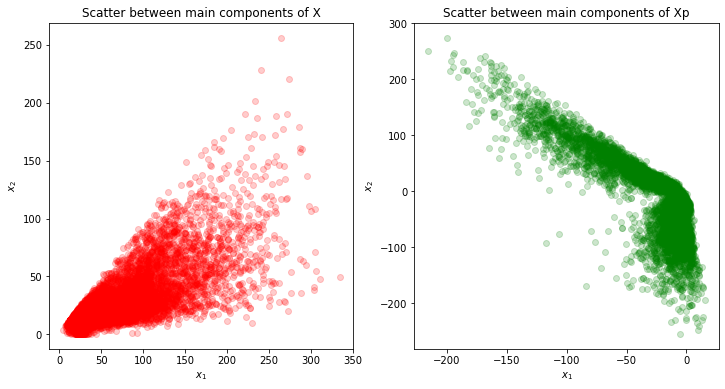

In [14]:
# manage data
df = pd.read_csv('data/magic04.data')
df = df.drop(columns=['g'])
# from DataFrame columns to a matrix numbOfCols-1 x numbOfRows
X = df.values.T
# number of elements for each column
n = len(X[0])

# eigenvalues and eigenvectors
C = np.cov(X)
l, V = np.linalg.eig(C)

# dimension reduction
Lambda = np.diag(l)
element = 4 # number of taken components
print('By selecting the first', element, 'components, we retain %.2f%% of the total variability' % (Lambda[:element, :element].trace()/Lambda.trace()*100))

# perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(n-1)
V_svd = U
Xp = np.dot(V_svd, X)


# plots
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

axis[0].scatter(X[0], X[1], alpha=0.2, color='r')
axis[1].scatter(Xp[0], Xp[1], alpha=0.2, color='g')

axis[0].set_xlabel('$x_1$')
axis[0].set_ylabel('$x_2$')
axis[1].set_xlabel('$x_1$')
axis[1].set_ylabel('$x_2$')

axis[0].set_title('Scatter between main components of X')
axis[1].set_title('Scatter between main components of Xp')

plt.show()